# Code to load Bitcoin, Gold, SP 500.

In [1]:
#pip install yfinance

# Load Prices

In [2]:
import yfinance as yf

def get_historical_prices(ticker, start_date, end_date):
    """
    Fetch historical prices for a given ticker between specified dates.
    """
    stock = yf.Ticker(ticker)
    hist = stock.history(start=start_date, end=end_date)
    return hist[['Close']]  # Return only the Close prices

# Define start and end dates
start_date = "2015-01-01"
end_date = "2024-11-23"

# Bitcoin (BTC-USD)
btc_prices = get_historical_prices("BTC-USD", start_date, end_date)
print("Bitcoin Historical Prices:")
print(btc_prices)

# Gold (tracked by SPDR Gold Shares ETF, GLD)
gold_prices = get_historical_prices("GLD", start_date, end_date)
print("\nGold Historical Prices:")
print(gold_prices)

# S&P 500 (tracked by SPDR S&P 500 ETF, SPY)
sp500_prices = get_historical_prices("SPY", start_date, end_date)
print("\nS&P 500 Historical Prices:")
print(sp500_prices)


Bitcoin Historical Prices:
                                  Close
Date                                   
2015-01-01 00:00:00+00:00    314.248993
2015-01-02 00:00:00+00:00    315.032013
2015-01-03 00:00:00+00:00    281.082001
2015-01-04 00:00:00+00:00    264.195007
2015-01-05 00:00:00+00:00    274.473999
...                                 ...
2024-11-18 00:00:00+00:00  90542.640625
2024-11-19 00:00:00+00:00  92343.789062
2024-11-20 00:00:00+00:00  94339.492188
2024-11-21 00:00:00+00:00  98504.726562
2024-11-22 00:00:00+00:00  98997.664062

[3614 rows x 1 columns]

Gold Historical Prices:
                                Close
Date                                 
2015-01-02 00:00:00-05:00  114.080002
2015-01-05 00:00:00-05:00  115.800003
2015-01-06 00:00:00-05:00  117.120003
2015-01-07 00:00:00-05:00  116.430000
2015-01-08 00:00:00-05:00  115.940002
...                               ...
2024-11-18 00:00:00-05:00  241.089996
2024-11-19 00:00:00-05:00  243.250000
2024-11-20 00:00:00-05:

In [3]:
btc_prices.head()

,Close
Date,
2015-01-01 00:00:00+00:00,314.248993
2015-01-02 00:00:00+00:00,315.032013
2015-01-03 00:00:00+00:00,281.082001
2015-01-04 00:00:00+00:00,264.195007
2015-01-05 00:00:00+00:00,274.473999


# Calculate the returns

In [4]:
# Remove timestamp from index (convert to date)
btc_prices.index = btc_prices.index.date
gold_prices.index = gold_prices.index.date
sp500_prices.index = sp500_prices.index.date

In [5]:
# Join the dataframes on the Date index
# Rename the 'Close' column to distinguish each DataFrame
btc_prices = btc_prices.rename(columns={"Close": "BTC-USD"})
gold_prices = gold_prices.rename(columns={"Close": "GLD"})
sp500_prices = sp500_prices.rename(columns={"Close": "SPY"})

In [6]:

# Join the DataFrames
combined_df = btc_prices.join(gold_prices, how="inner").join(sp500_prices, how="inner")


In [7]:
# Function to calculate returns over N years
def calculate_returns(df, years):
    """
    Calculate the return over a specified number of years.
    """
    periods = 252 * years  # Assume 252 trading days in a year
    returns = df.shift(-periods) / df - 1  # (Future Value / Present Value - 1)
    return returns

# Calculate individual returns for each asset and time period
combined_df["BTC 1Y Return"] = calculate_returns(combined_df["BTC-USD"], 1)
combined_df["BTC 2Y Return"] = calculate_returns(combined_df["BTC-USD"], 2)
combined_df["BTC 3Y Return"] = calculate_returns(combined_df["BTC-USD"], 3)
combined_df["BTC 4Y Return"] = calculate_returns(combined_df["BTC-USD"], 4)

combined_df["GLD 1Y Return"] = calculate_returns(combined_df["GLD"], 1)
combined_df["GLD 2Y Return"] = calculate_returns(combined_df["GLD"], 2)
combined_df["GLD 3Y Return"] = calculate_returns(combined_df["GLD"], 3)
combined_df["GLD 4Y Return"] = calculate_returns(combined_df["GLD"], 4)

combined_df["SPY 1Y Return"] = calculate_returns(combined_df["SPY"], 1)
combined_df["SPY 2Y Return"] = calculate_returns(combined_df["SPY"], 2)
combined_df["SPY 3Y Return"] = calculate_returns(combined_df["SPY"], 3)
combined_df["SPY 4Y Return"] = calculate_returns(combined_df["SPY"], 4)


In [8]:
combined_df.head()

,BTC-USD,GLD,SPY,BTC 1Y Return,BTC 2Y Return,BTC 3Y Return,BTC 4Y Return,GLD 1Y Return,GLD 2Y Return,GLD 3Y Return,GLD 4Y Return,SPY 1Y Return,SPY 2Y Return,SPY 3Y Return,SPY 4Y Return
2015-01-02,315.032013,114.080002,173.173767,0.374752,2.313441,47.252239,11.245478,-0.098089,-0.031644,0.094144,0.064516,-0.001275,0.143088,0.399315,0.330578
2015-01-05,274.473999,115.800003,170.046310,0.573774,3.207065,55.833071,13.665317,-0.108981,-0.042660,0.083420,0.052332,0.018814,0.171037,0.431058,0.365734
2015-01-06,286.188995,117.120003,168.444626,0.499376,2.540947,59.902062,13.084566,-0.106301,-0.038764,0.070099,0.037654,0.015528,0.181233,0.454292,0.391674
2015-01-07,294.337006,116.430000,170.543640,0.556203,2.065197,50.539899,12.709783,-0.088293,-0.040196,0.076269,0.050502,-0.021035,0.170869,0.439019,0.380969
2015-01-08,283.348999,115.940002,173.569962,0.599547,2.186276,50.510330,11.983722,-0.088494,-0.028204,0.075815,0.048732,-0.048663,0.146656,0.417130,0.361678


# Show Distribution By year.

In [9]:
import pandas as pd
periods = [1,2,3,4]
# Ensure combined_df has no duplicate indices
combined_df = combined_df.loc[~combined_df.index.duplicated(keep="first")]

# Check for duplicate labels in boxplot_data
melted_data = []  # Reset the melted data list

for period in periods:
    for asset in ["BTC", "GLD", "SPY"]:
        # Append data for each asset and period
        melted_data.append(
            pd.DataFrame({
                "Return": combined_df[f"{asset} {period}Y Return"],
                "Asset": asset,
                "Period": f"{period}-Year"
            })
        )

# Combine all data into a single DataFrame
boxplot_data = pd.concat(melted_data, axis=0)

# Ensure boxplot_data index is unique
boxplot_data = boxplot_data.reset_index(drop=True)


In [10]:
print(boxplot_data.head())  # Check the first few rows
print(boxplot_data.isnull().sum())  # Check for missing values
print(boxplot_data[boxplot_data.duplicated()])  # Check for duplicate rows

     Return Asset  Period
0  0.374752   BTC  1-Year
1  0.573774   BTC  1-Year
2  0.499376   BTC  1-Year
3  0.556203   BTC  1-Year
4  0.599547   BTC  1-Year
Return    7560
Asset        0
Period       0
dtype: int64
       Return Asset  Period
2240      NaN   BTC  1-Year
2241      NaN   BTC  1-Year
2242      NaN   BTC  1-Year
2243      NaN   BTC  1-Year
2244      NaN   BTC  1-Year
...       ...   ...     ...
29887     NaN   SPY  4-Year
29888     NaN   SPY  4-Year
29889     NaN   SPY  4-Year
29890     NaN   SPY  4-Year
29891     NaN   SPY  4-Year

[7548 rows x 3 columns]


/tmp/ipykernel_2633/1285579473.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_2633/1285579473.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


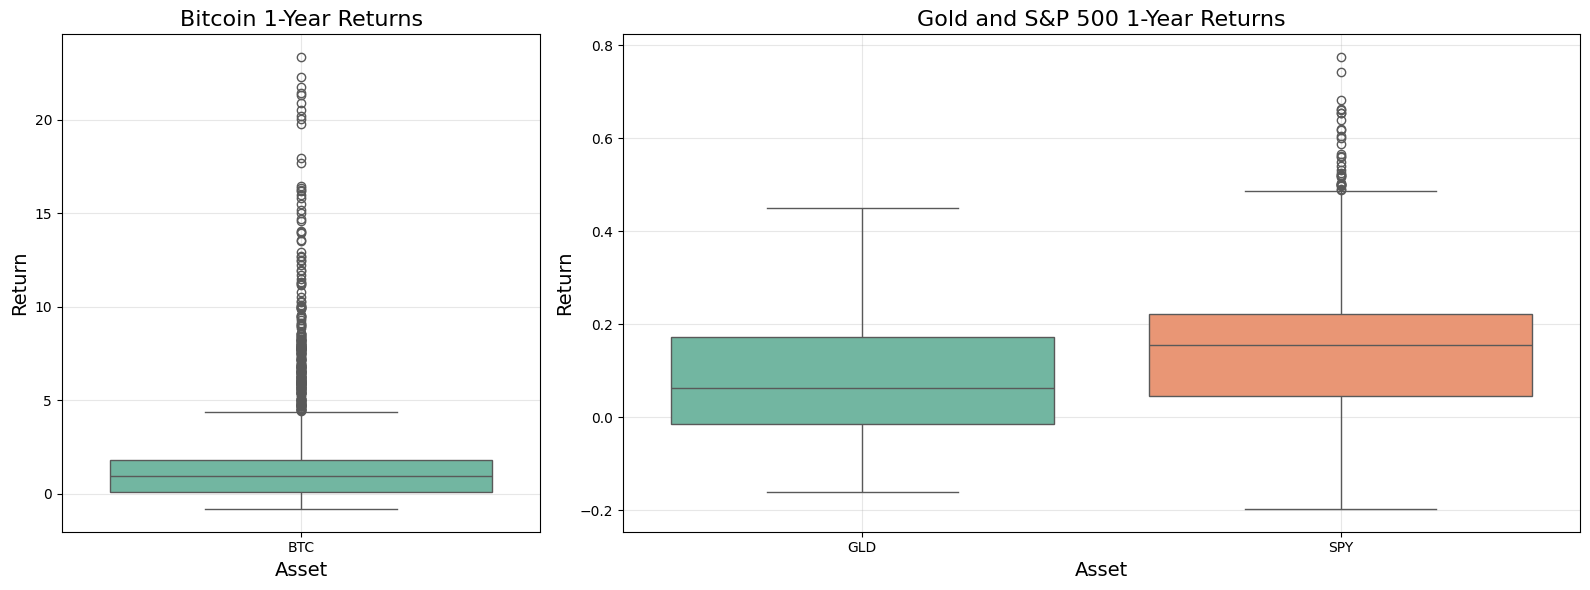

/tmp/ipykernel_2633/1285579473.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_2633/1285579473.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


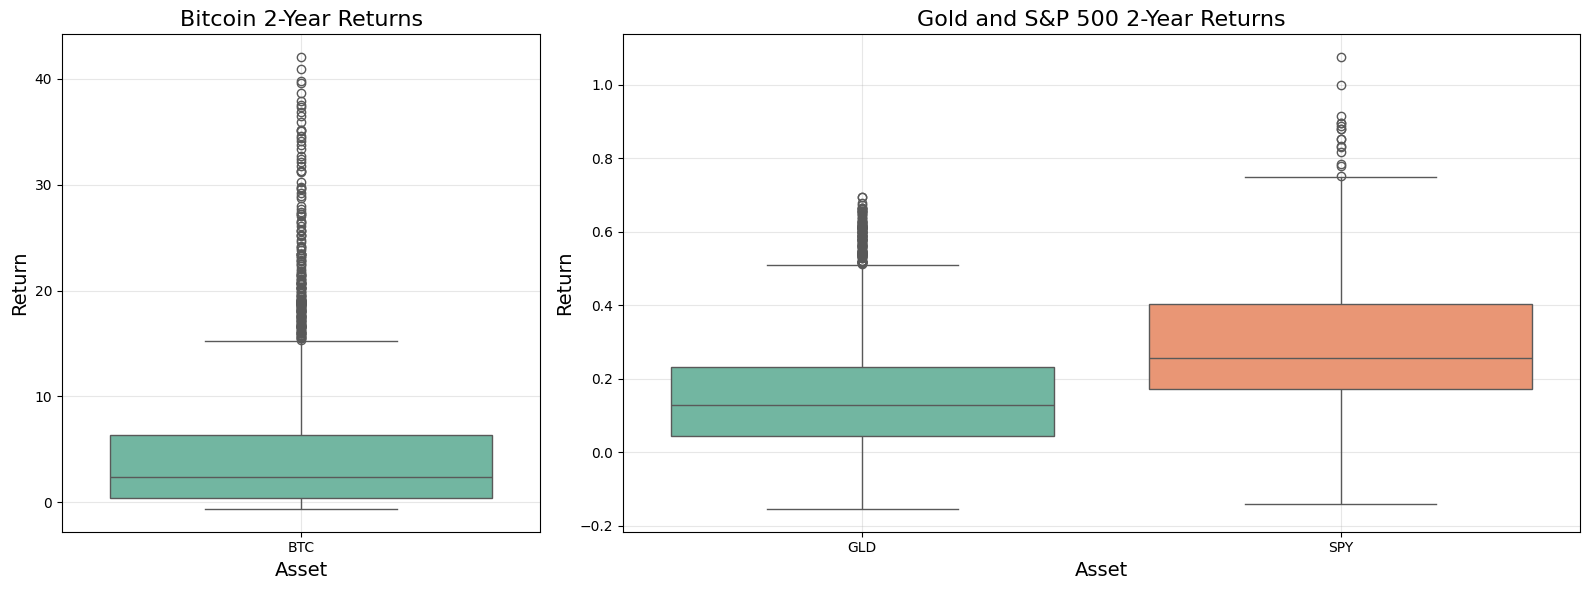

/tmp/ipykernel_2633/1285579473.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_2633/1285579473.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


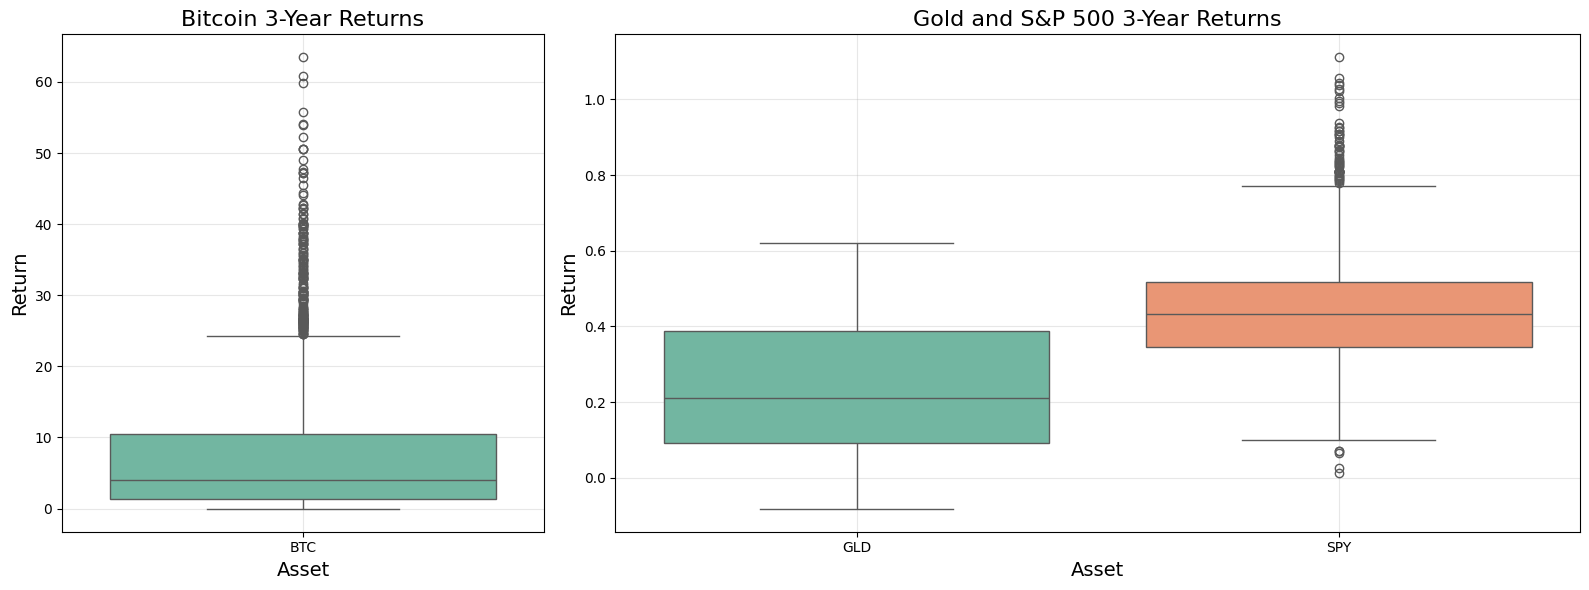

/tmp/ipykernel_2633/1285579473.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_2633/1285579473.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


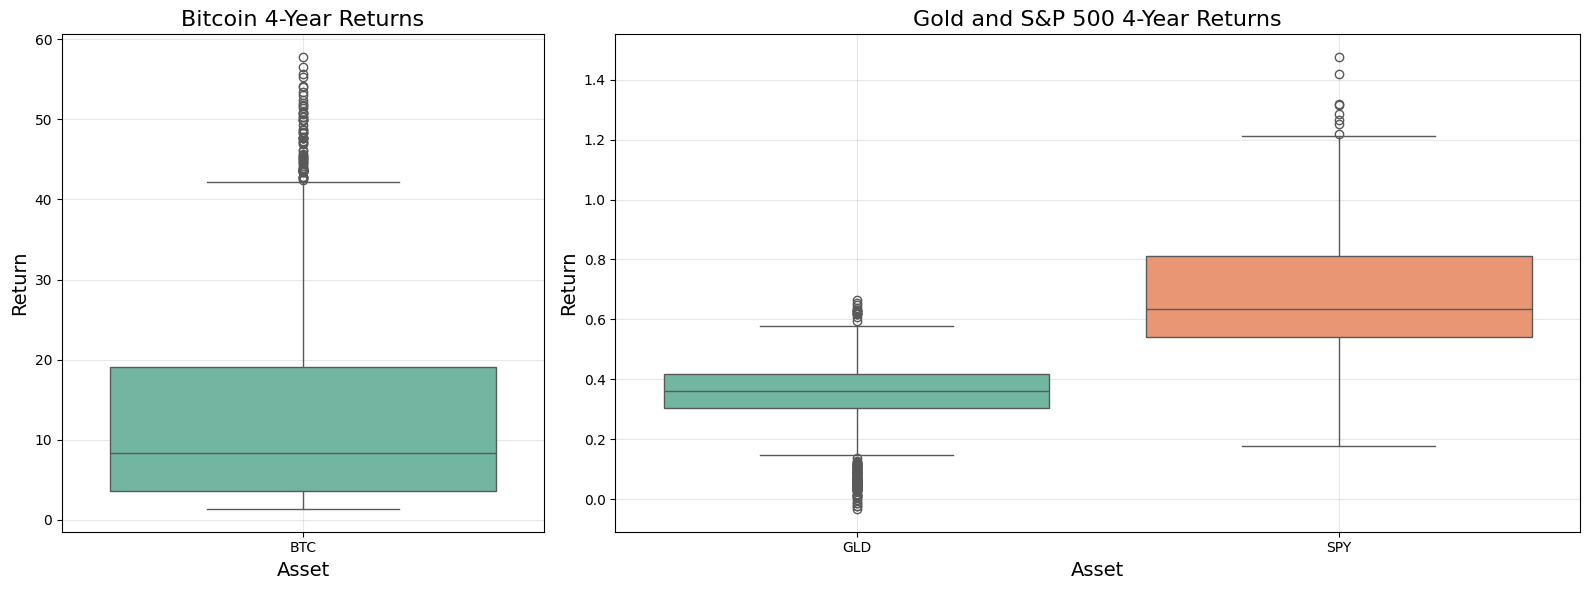

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

for period in periods:
    # Create a single figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={"width_ratios": [1, 2]})
    
    # Filter data for Bitcoin
    btc_data = boxplot_data[
        (boxplot_data["Asset"] == "BTC") & (boxplot_data["Period"] == f"{period}-Year")
    ]
    
    # Filter data for Gold and S&P 500
    gold_sp500_data = boxplot_data[
        (boxplot_data["Asset"].isin(["GLD", "SPY"])) & (boxplot_data["Period"] == f"{period}-Year")
    ]
    
    # Plot Bitcoin returns on the first subplot
    sns.boxplot(
        x="Asset", y="Return", data=btc_data, palette="Set2", ax=axes[0]
    )
    axes[0].set_title(f"Bitcoin {period}-Year Returns", fontsize=16)
    axes[0].set_xlabel("Asset", fontsize=14)
    axes[0].set_ylabel("Return", fontsize=14)
    axes[0].grid(alpha=0.3)
    
    # Plot Gold and S&P 500 returns on the second subplot
    sns.boxplot(
        x="Asset", y="Return", data=gold_sp500_data, palette="Set2", ax=axes[1]
    )
    axes[1].set_title(f"Gold and S&P 500 {period}-Year Returns", fontsize=16)
    axes[1].set_xlabel("Asset", fontsize=14)
    axes[1].set_ylabel("Return", fontsize=14)
    axes[1].grid(alpha=0.3)
    
    # Adjust spacing
    plt.tight_layout()
    plt.show()


In [12]:
def create_lift_chart_for_asset(df, asset, period, bins=100):
    """
    Create a lift chart for a specific asset and period.
    
    Parameters:
        df: DataFrame containing the return data.
        asset: The asset to analyze (e.g., "BTC", "GLD", "SPY").
        period: The return period to analyze (e.g., 1, 2, 3, or 4 for year periods).
        bins: The number of bins to divide the data into (default: 100).
        
    Returns:
        A DataFrame containing the bins, min return, max return, and asset information.
    """
    # Sort returns in descending order
    sorted_returns = df[f"{asset} {period}Y Return"].sort_values(ascending=False)
    
    # Create bins using pandas.qcut
    bin_labels = range(1, bins + 1)  # Label bins from 1 to 100
    sorted_returns_binned = pd.qcut(
        sorted_returns.rank(method="first"), 
        q=bins, 
        labels=bin_labels
    )
    
    # Group by bins and calculate min and max
    binned_summary = sorted_returns.groupby(sorted_returns_binned).agg(["min", "max"]).reset_index()
    binned_summary.columns = ["Bin", "Min Return", "Max Return"]
    binned_summary["Asset"] = asset
    binned_summary["Period"] = f"{period}-Year"
    
    # Sort by max return in descending order
    binned_summary = binned_summary.sort_values(by="Max Return", ascending=False).reset_index(drop=True)
    
    return binned_summary

# Example usage
liftchart_btc_1y = create_lift_chart_for_asset(combined_df, asset="BTC", period=1)
liftchart_btc_2y = create_lift_chart_for_asset(combined_df, asset="BTC", period=2)
liftchart_btc_3y = create_lift_chart_for_asset(combined_df, asset="BTC", period=3)
liftchart_btc_4y = create_lift_chart_for_asset(combined_df, asset="BTC", period=4)
liftchart_SP500_1y = create_lift_chart_for_asset(combined_df, asset="SPY", period=1)
liftchart_GLD_1y = create_lift_chart_for_asset(combined_df, asset="GLD", period=1)


/tmp/ipykernel_2633/2333297307.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_summary = sorted_returns.groupby(sorted_returns_binned).agg(["min", "max"]).reset_index()
/tmp/ipykernel_2633/2333297307.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_summary = sorted_returns.groupby(sorted_returns_binned).agg(["min", "max"]).reset_index()
/tmp/ipykernel_2633/2333297307.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and si

In [13]:
import pandas as pd
pd.set_option('display.max_rows', None)
liftchart_btc_4y.head()

,Bin,Min Return,Max Return,Asset,Period
0,100,50.853653,57.811877,BTC,4-Year
1,99,47.850504,50.813042,BTC,4-Year
2,98,45.178061,47.710584,BTC,4-Year
3,97,43.673492,45.124166,BTC,4-Year
4,96,42.193464,43.581166,BTC,4-Year


# Trying to visualizet the reutrns

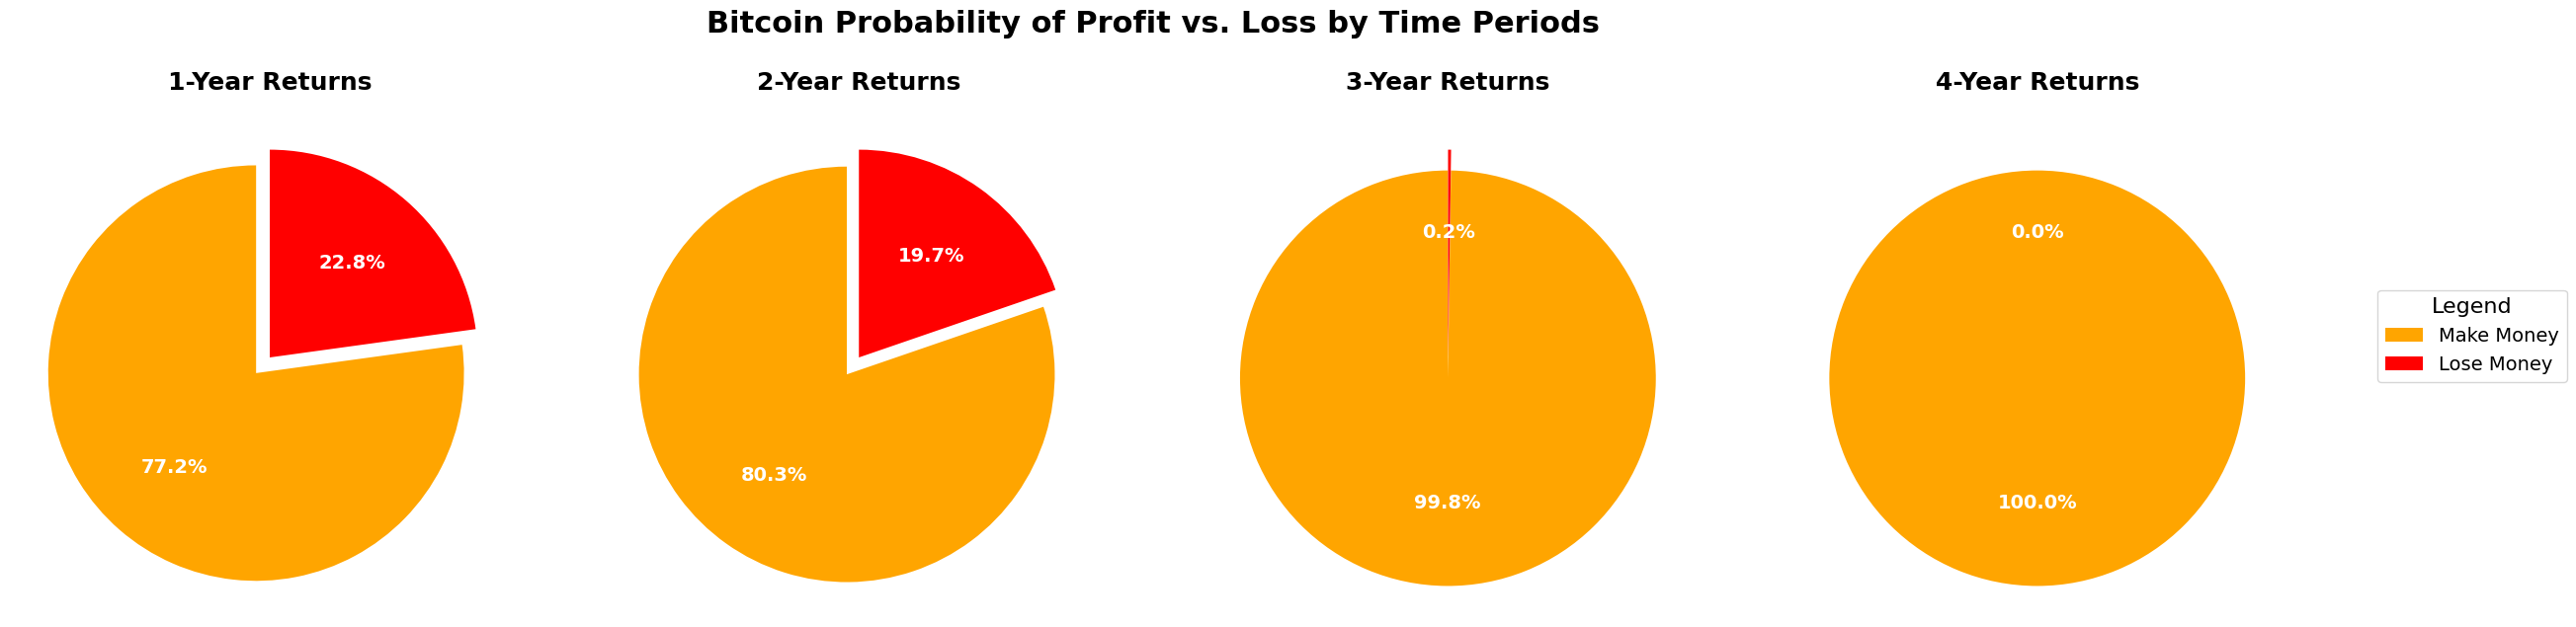

In [18]:
fig, axes = plt.subplots(1, 4, figsize=(24, 6))  # 1 row, 4 columns

# Define the periods and corresponding axes
periods = [1, 2, 3, 4]

for i, period in enumerate(periods):
    # Extract returns for the current period
    btc_returns = combined_df[f"BTC {period}Y Return"].dropna()
    
    # Classify returns as positive or negative
    positive_days = (btc_returns > 0).sum()
    negative_days = (btc_returns <= 0).sum()
    
    # Calculate probabilities
    total_days = len(btc_returns)
    positive_prob = positive_days / total_days
    negative_prob = negative_days / total_days
    
    # Data for the pie chart
    sizes = [positive_prob, negative_prob]
    colors = ["orange", "red"]
    explode = (0.1, 0)  # Slightly "explode" the "Make Money" slice
    
    # Create a pie chart for the current period
    wedges, _, autotexts = axes[i].pie(
        sizes, 
        explode=explode, 
        labels=None,  # Remove labels
        colors=colors, 
        autopct=lambda p: f"{p:.1f}%", 
        startangle=90, 
        textprops={"fontsize": 14, "weight": "bold"}
    )
    
    # Customize percentage text inside pie chart
    for autotext in autotexts:
        autotext.set_color("white")  # Make percentages white
        autotext.set_weight("bold")  # Bold percentages

    # Add title for the subplot
    axes[i].set_title(f"{period}-Year Returns", fontsize=18, weight="bold")  # Larger and bold title

# Add a single legend outside the subplots
fig.legend(
    ["Make Money", "Lose Money"], 
    loc="center right", 
    fontsize=14, 
    title="Legend", 
    title_fontsize=16, 
    bbox_to_anchor=(1.1, 0.5)
)

# Add a global title
fig.suptitle("Bitcoin Probability of Profit vs. Loss by Time Periods", fontsize=22, weight="bold", y=1.05)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


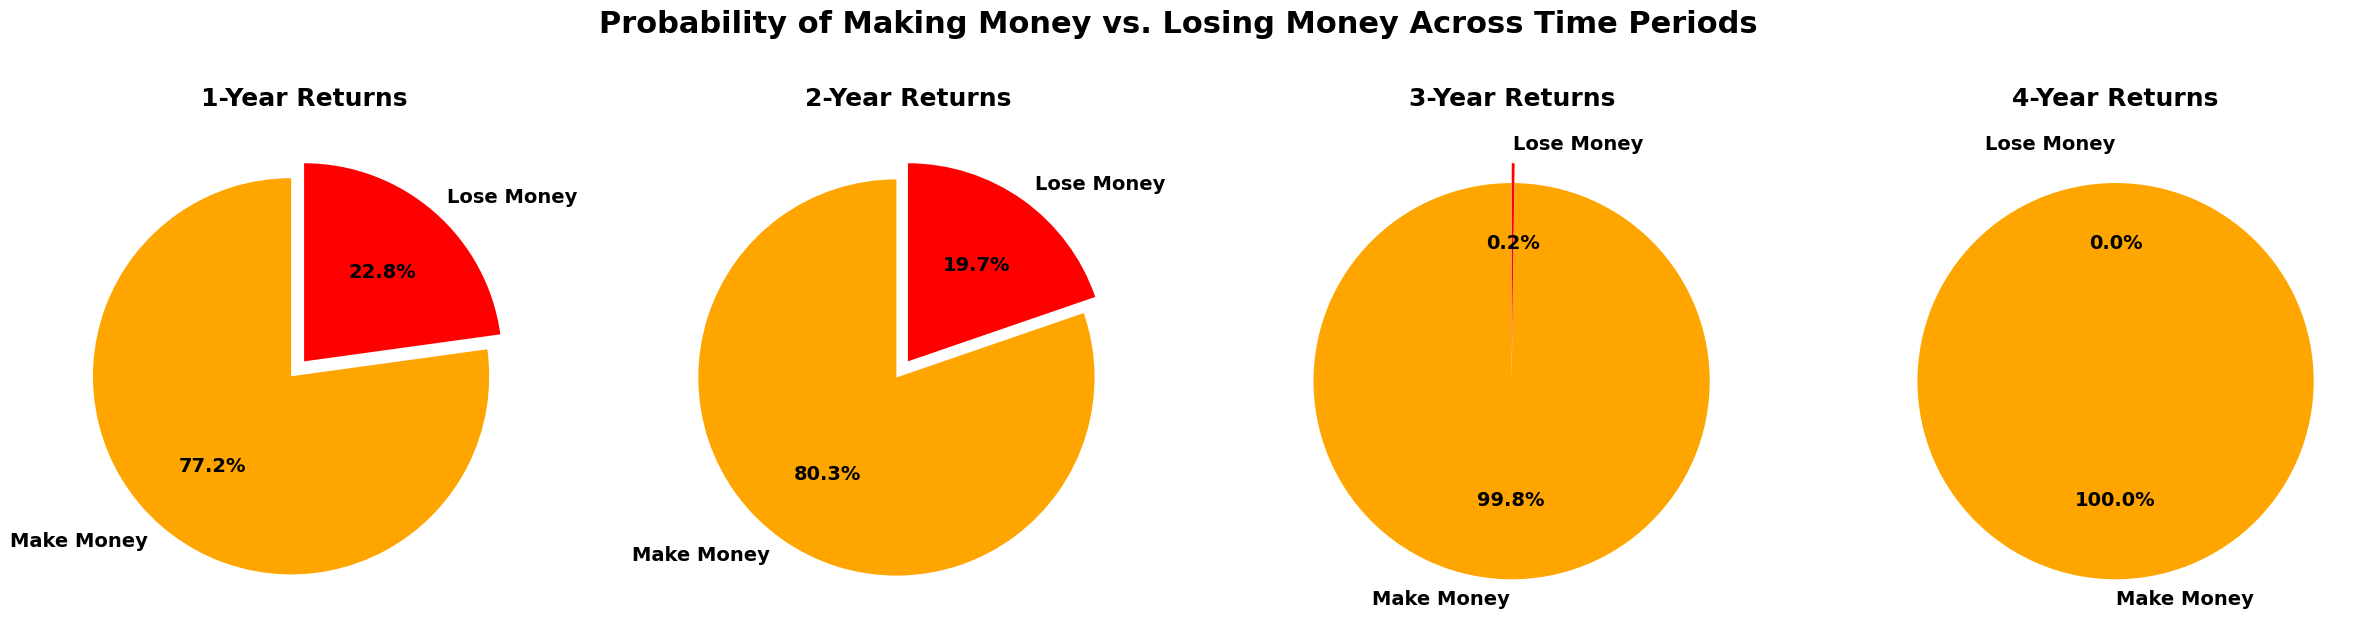

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(24, 6))  # 1 row, 4 columns

# Define the periods and corresponding axes
periods = [1, 2, 3, 4]

for i, period in enumerate(periods):
    # Extract returns for the current period
    btc_returns = combined_df[f"BTC {period}Y Return"].dropna()
    
    # Classify returns as positive or negative
    positive_days = (btc_returns > 0).sum()
    negative_days = (btc_returns <= 0).sum()
    
    # Calculate probabilities
    total_days = len(btc_returns)
    positive_prob = positive_days / total_days
    negative_prob = negative_days / total_days
    
    # Data for the pie chart
    labels = ["Make Money", "Lose Money"]
    sizes = [positive_prob, negative_prob]
    colors = ["orange", "red"]
    explode = (0.1, 0)  # Slightly "explode" the "Make Money" slice
    
    # Create a pie chart for the current period
    axes[i].pie(
        sizes, 
        explode=explode, 
        labels=labels, 
        colors=colors, 
        autopct=lambda p: f"{p:.1f}%", 
        startangle=90, 
        textprops={"fontsize": 14, "weight": "bold"}  # Increase font size and bold text
    )
    
    # Add title for the subplot
    axes[i].set_title(f"{period}-Year Returns", fontsize=18, weight="bold")  # Larger and bold title

# Add a global title
fig.suptitle("Probability of Making Money vs. Losing Money Across Time Periods", fontsize=22, weight="bold", y=1.05)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()



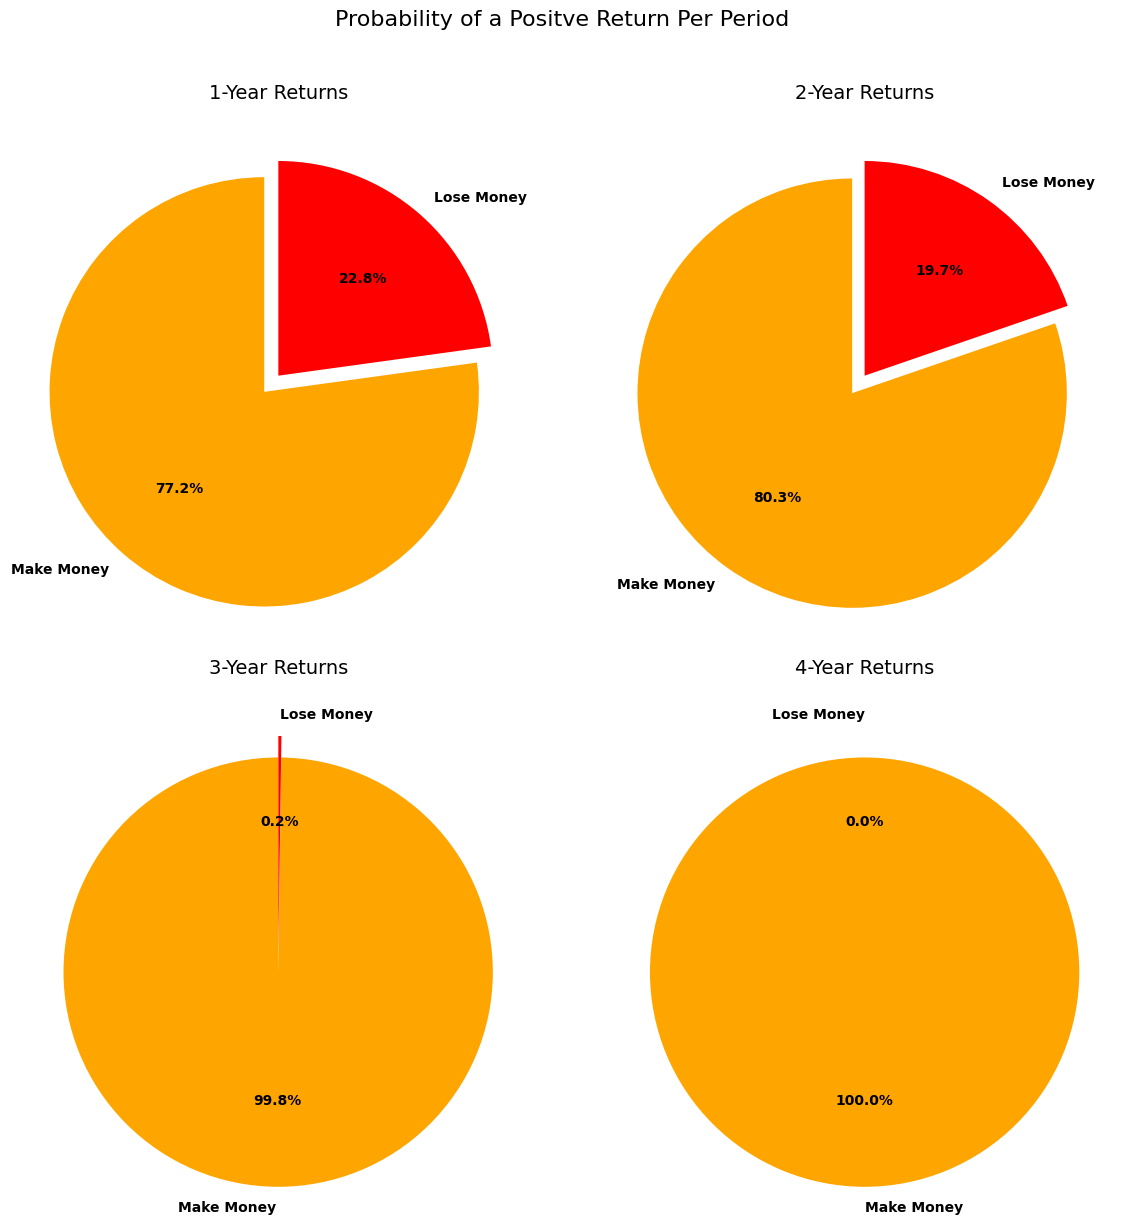

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))  # 2 rows, 2 columns

# Define the periods and corresponding axes
periods = [1, 2, 3, 4]
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

for i, period in enumerate(periods):
    # Extract returns for the current period
    btc_returns = combined_df[f"BTC {period}Y Return"].dropna()
    
    # Classify returns as positive or negative
    positive_days = (btc_returns > 0).sum()
    negative_days = (btc_returns <= 0).sum()
    
    # Calculate probabilities
    total_days = len(btc_returns)
    positive_prob = positive_days / total_days
    negative_prob = negative_days / total_days
    
    # Data for the pie chart
    labels = ["Make Money", "Lose Money"]
    sizes = [positive_prob, negative_prob]
    colors = ["orange", "red"]
    explode = (0.1, 0)  # Slightly "explode" the "Make Money" slice
    
    # Create a pie chart for the current period
    axes[i].pie(
        sizes, 
        explode=explode, 
        labels=labels, 
        colors=colors, 
        autopct=lambda p: f"{p:.1f}%", 
        startangle=90, 
        textprops={"fontsize": 10, "weight": "bold"}
    )
    
    # Add title for the subplot
    axes[i].set_title(f"{period}-Year Returns", fontsize=14)

# Add a global title
fig.suptitle("Probability of a Positve Return Per Period", fontsize=16, y=1.02)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


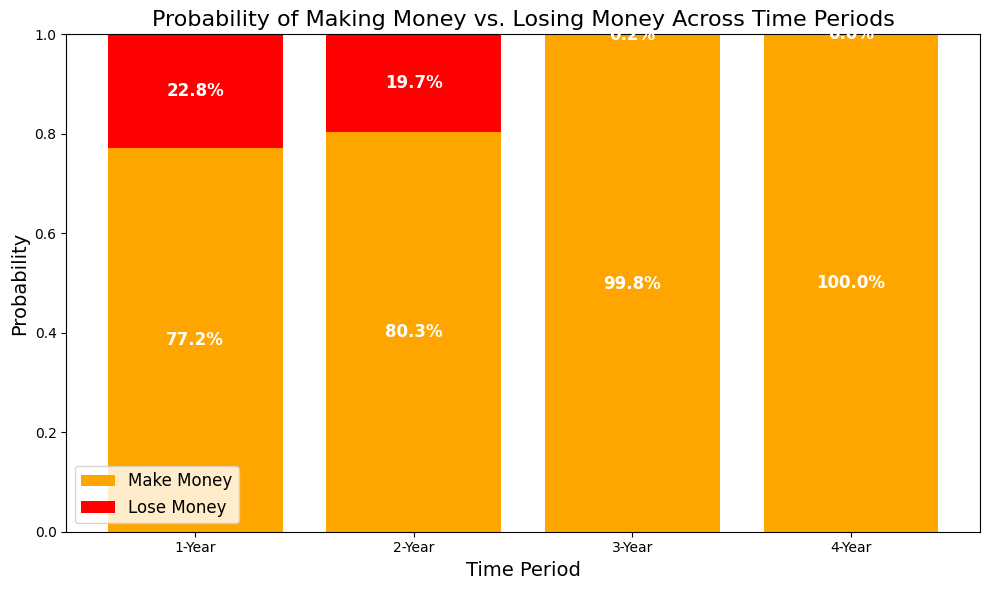

In [18]:
import matplotlib.pyplot as plt

# Define the periods
periods = [1, 2, 3, 4]

# Initialize lists for storing probabilities
make_money_probs = []
lose_money_probs = []

# Calculate probabilities for each period
for period in periods:
    btc_returns = combined_df[f"BTC {period}Y Return"].dropna()
    
    # Classify returns as positive or negative
    positive_days = (btc_returns > 0).sum()
    negative_days = (btc_returns <= 0).sum()
    
    # Calculate probabilities
    total_days = len(btc_returns)
    positive_prob = positive_days / total_days
    negative_prob = negative_days / total_days
    
    # Append probabilities to lists
    make_money_probs.append(positive_prob)
    lose_money_probs.append(negative_prob)

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
labels = [f"{period}-Year" for period in periods]

# Plot the bars
ax.bar(labels, make_money_probs, label="Make Money", color="orange")
ax.bar(labels, lose_money_probs, bottom=make_money_probs, label="Lose Money", color="red")

# Add labels and title
ax.set_title("Probability of Making Money vs. Losing Money Across Time Periods", fontsize=16)
ax.set_ylabel("Probability", fontsize=14)
ax.set_xlabel("Time Period", fontsize=14)
ax.set_ylim(0, 1)
ax.legend(fontsize=12)

# Annotate the bars with percentages
for i, (make_prob, lose_prob) in enumerate(zip(make_money_probs, lose_money_probs)):
    ax.text(i, make_prob / 2, f"{make_prob:.1%}", ha="center", va="center", fontsize=12, color="white", weight="bold")
    ax.text(i, make_prob + (lose_prob / 2), f"{lose_prob:.1%}", ha="center", va="center", fontsize=12, color="white", weight="bold")

# Show the plot
plt.tight_layout()
plt.show()



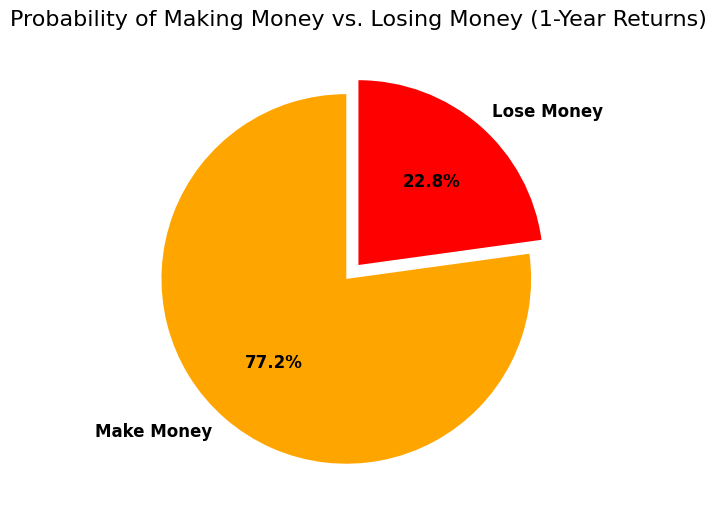

In [18]:
# Pie chart for probabilities
fig, ax = plt.subplots(figsize=(6, 6))
labels = ["Make Money", "Lose Money"]
sizes = [positive_prob, negative_prob]
colors = ["orange", "red"]  # Keep orange and red for slices
explode = (0.1, 0)  # Slightly "explode" the "Make Money" slice

# Define text properties for the autopct
def autopct_format(p):
    return f"{p:.1f}%"

# Plot pie chart
ax.pie(
    sizes, 
    explode=explode, 
    labels=labels, 
    colors=colors, 
    autopct=autopct_format, 
    startangle=90, 
    textprops={"fontsize": 12, "weight": "bold"},  # Bold and black text for labels
    labeldistance=1.1  # Adjust distance of labels
)

# Add a title
ax.set_title("Probability of Making Money vs. Losing Money (1-Year Returns)", fontsize=16)

# Show the plot
plt.show()


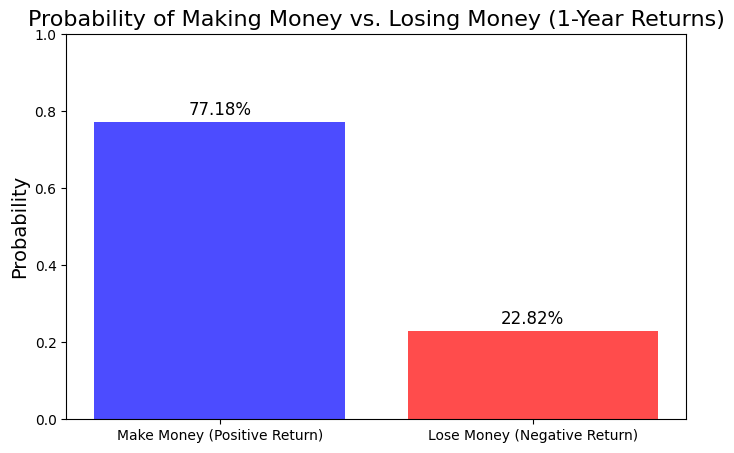

In [15]:

btc_1y_returns = combined_df["BTC 1Y Return"].dropna()

# Classify returns as positive or negative
positive_days = (btc_1y_returns > 0).sum()
negative_days = (btc_1y_returns <= 0).sum()

# Calculate probabilities
total_days = len(btc_1y_returns)
positive_prob = positive_days / total_days
negative_prob = negative_days / total_days

# Create a bar chart
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(["Make Money (Positive Return)", "Lose Money (Negative Return)"], 
       [positive_prob, negative_prob], color=["blue", "red"], alpha=0.7)

# Add labels and title
ax.set_title("Probability of Making Money vs. Losing Money (1-Year Returns)", fontsize=16)
ax.set_ylabel("Probability", fontsize=14)
ax.set_ylim(0, 1)
for i, prob in enumerate([positive_prob, negative_prob]):
    ax.text(i, prob + 0.02, f"{prob:.2%}", ha="center", fontsize=12)

# Show the plot
plt.show()

/tmp/ipykernel_2275/4123622939.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Asset", y="Return", data=period_data, palette="Set2")


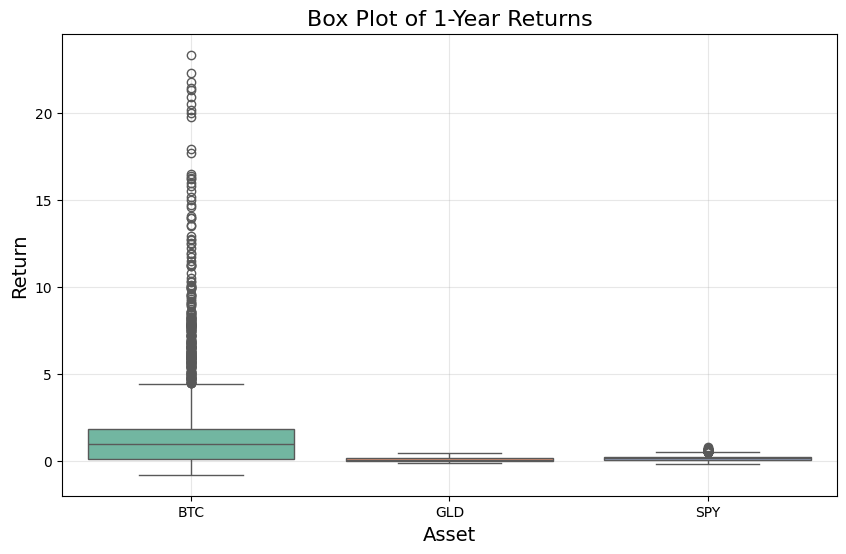

/tmp/ipykernel_2275/4123622939.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Asset", y="Return", data=period_data, palette="Set2")


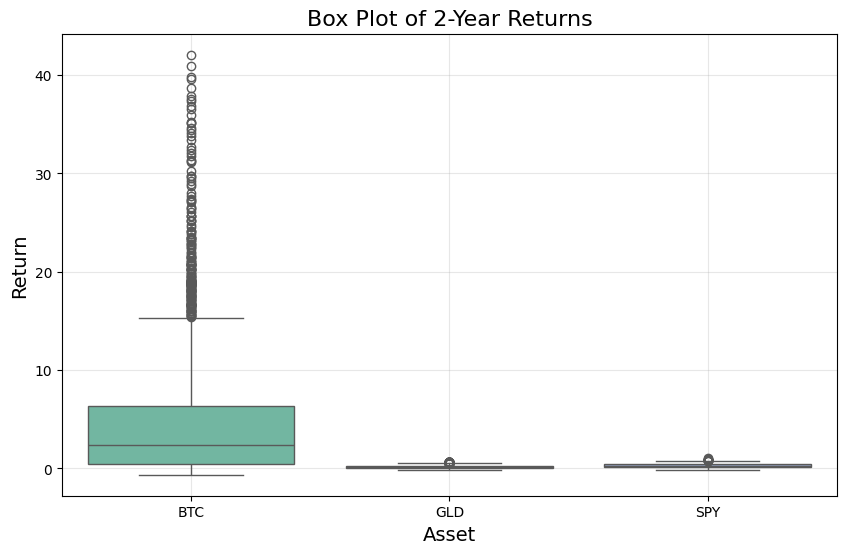

/tmp/ipykernel_2275/4123622939.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Asset", y="Return", data=period_data, palette="Set2")


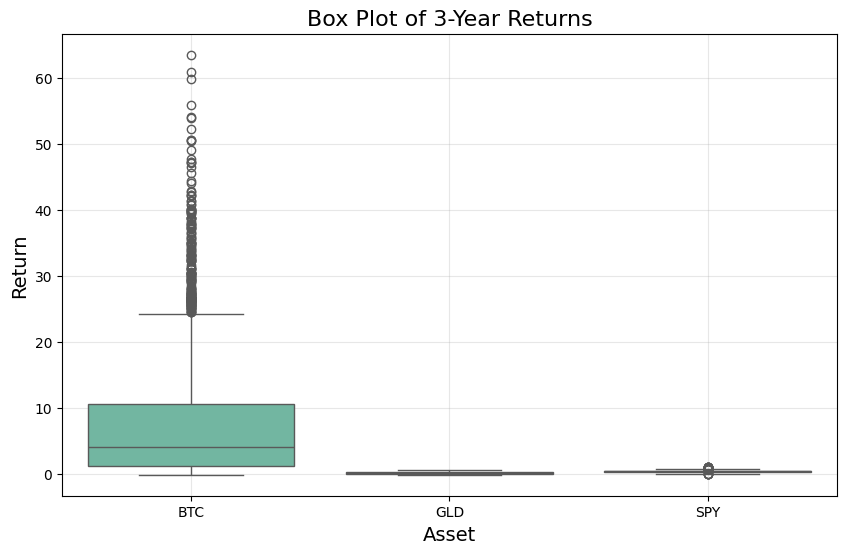

/tmp/ipykernel_2275/4123622939.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Asset", y="Return", data=period_data, palette="Set2")


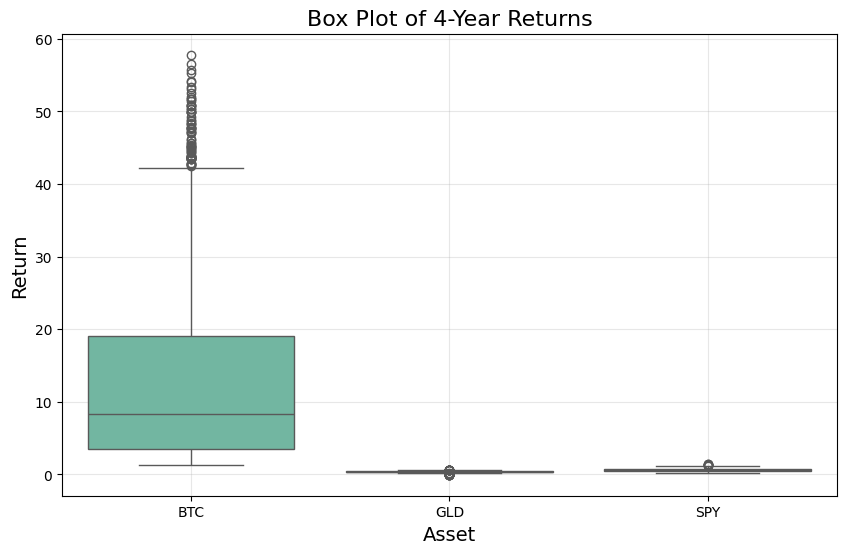

In [18]:
for period in periods:
    plt.figure(figsize=(10, 6))
    
    # Filter data for the current period
    period_data = boxplot_data[boxplot_data["Period"] == f"{period}-Year"]
    
    # Create a box plot
    sns.boxplot(x="Asset", y="Return", data=period_data, palette="Set2")
    
    # Add labels and title
    plt.title(f"Box Plot of {period}-Year Returns", fontsize=16)
    plt.xlabel("Asset", fontsize=14)
    plt.ylabel("Return", fontsize=14)
    plt.grid(alpha=0.3)
    
    # Show the plot
    plt.show()

# Trying a scatter plot

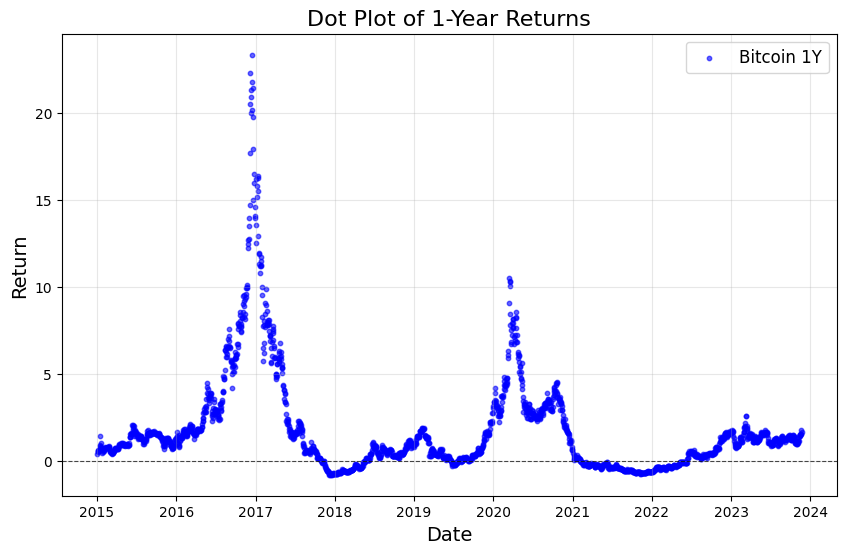

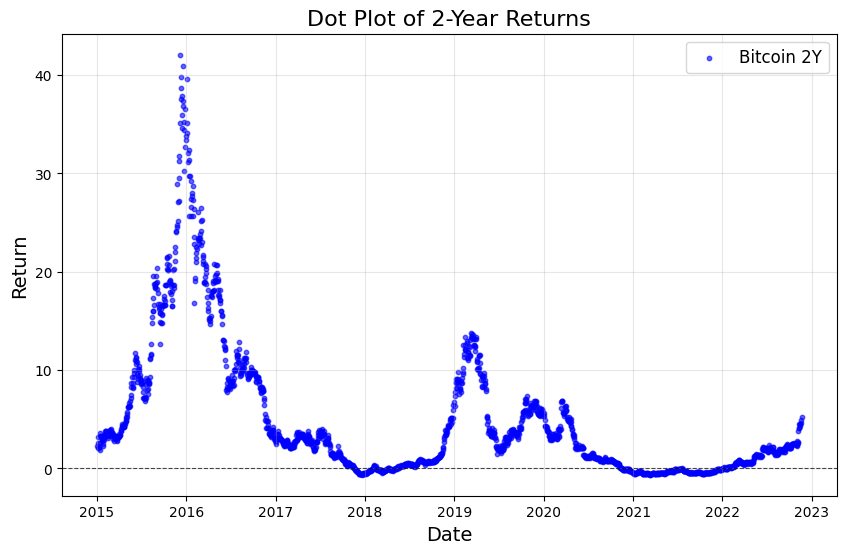

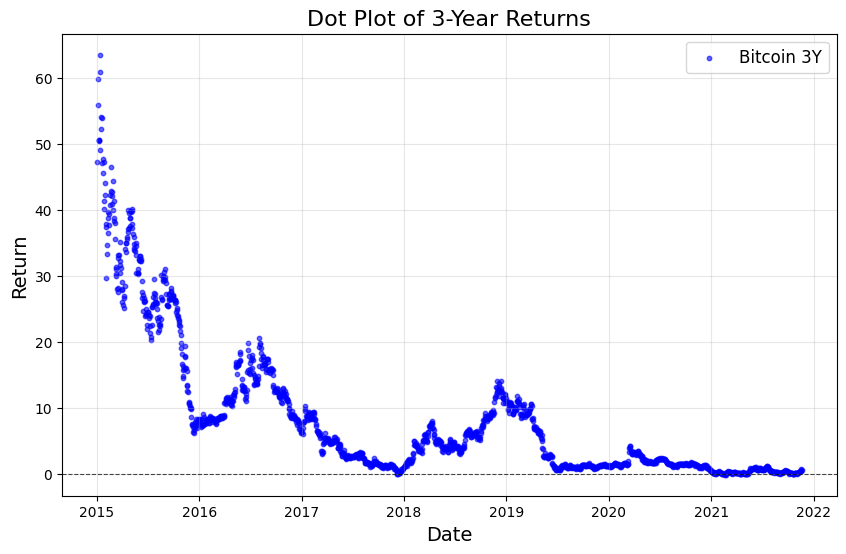

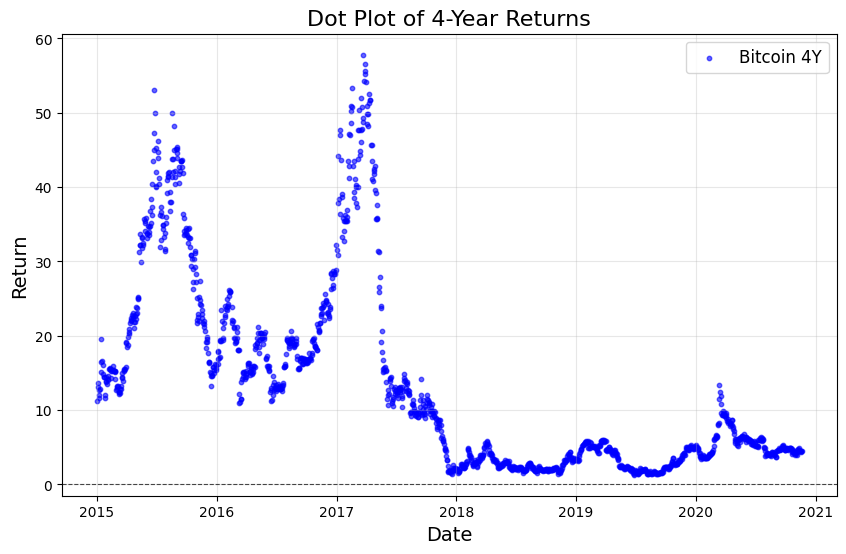

In [23]:
for period in periods:
    plt.figure(figsize=(10, 6))
    
    # Dot plot for Bitcoin
    plt.scatter(
        combined_df.index, 
        combined_df[f"BTC {period}Y Return"], 
        alpha=0.6, 
        label=f"Bitcoin {period}Y", 
        color='blue', 
        s=10
    )
    
    
    # Add labels and title
    plt.title(f"Dot Plot of {period}-Year Returns", fontsize=16)
    plt.xlabel("Date", fontsize=14)
    plt.ylabel("Return", fontsize=14)
    plt.axhline(0, color='black', linestyle='--', linewidth=0.8, alpha=0.7)  # Add horizontal line at 0
    plt.legend(fontsize=12)
    plt.grid(alpha=0.3)
    
    # Show the plot
    plt.show()


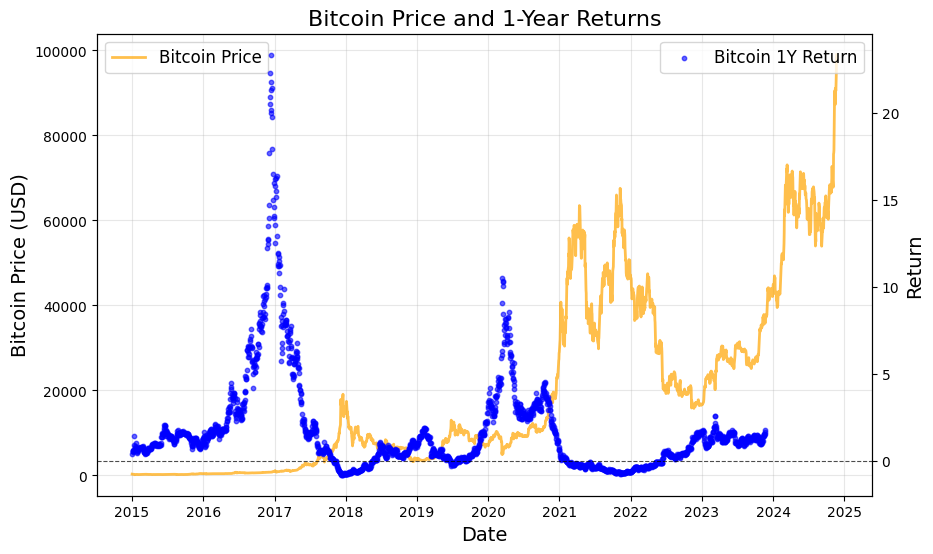

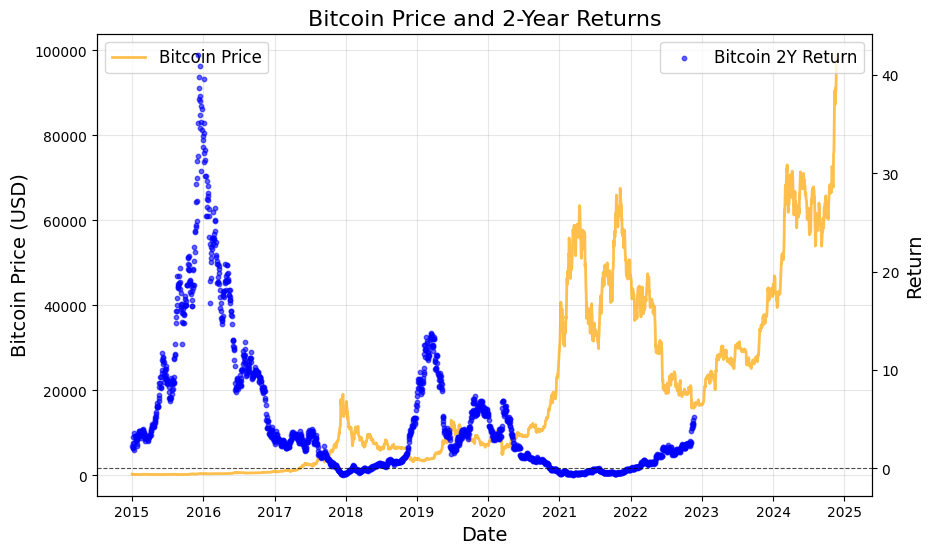

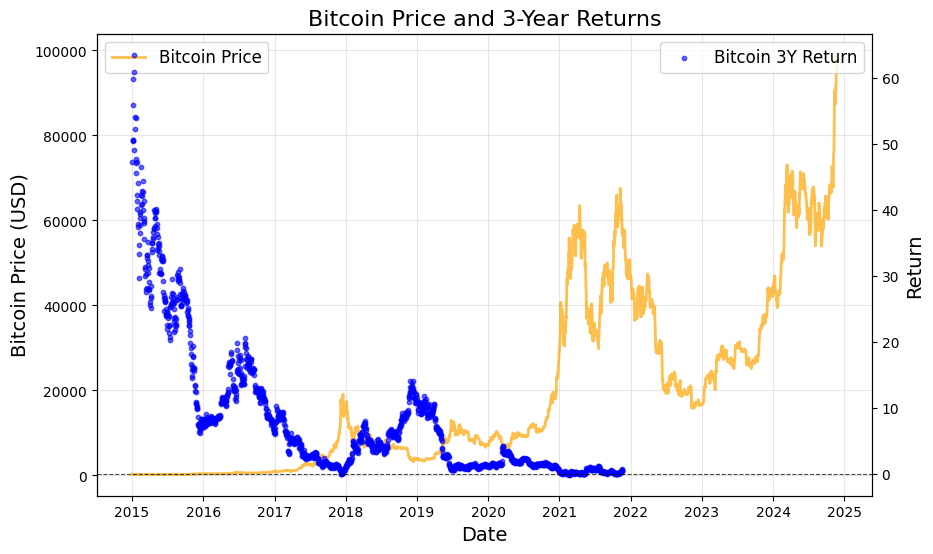

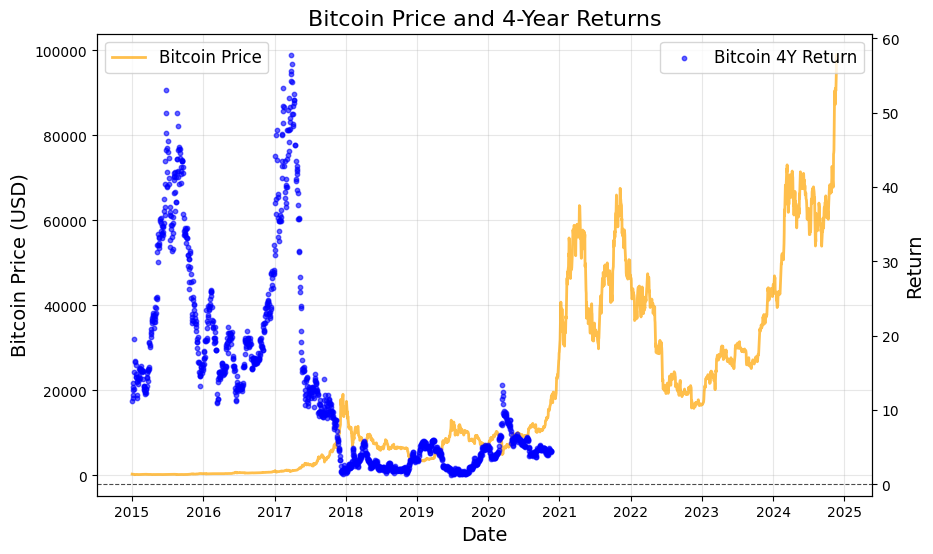

In [25]:
for period in periods:
    fig, ax1 = plt.subplots(figsize=(10, 6))
    
    # Line plot for Bitcoin price on the primary y-axis
    ax1.plot(
        combined_df.index, 
        combined_df["BTC-USD"], 
        color='orange', 
        label="Bitcoin Price", 
        linewidth=2, 
        alpha=0.7
    )
    
    # Customize primary y-axis for Bitcoin price
    ax1.set_ylabel("Bitcoin Price (USD)", fontsize=14)
    ax1.grid(alpha=0.3)
    ax1.legend(loc="upper left", fontsize=12)
    ax1.set_xlabel("Date", fontsize=14)
    
    # Create a secondary y-axis for Bitcoin returns
    ax2 = ax1.twinx()
    ax2.scatter(
        combined_df.index, 
        combined_df[f"BTC {period}Y Return"], 
        alpha=0.6, 
        label=f"Bitcoin {period}Y Return", 
        color='blue', 
        s=10
    )
    
    # Customize secondary y-axis for Bitcoin returns
    ax2.set_ylabel("Return", fontsize=14)
    ax2.axhline(0, color='black', linestyle='--', linewidth=0.8, alpha=0.7)  # Add horizontal line at 0
    ax2.legend(loc="upper right", fontsize=12)
    
    # Add title
    plt.title(f"Bitcoin Price and {period}-Year Returns", fontsize=16)
    
    # Show the plot
    plt.show()



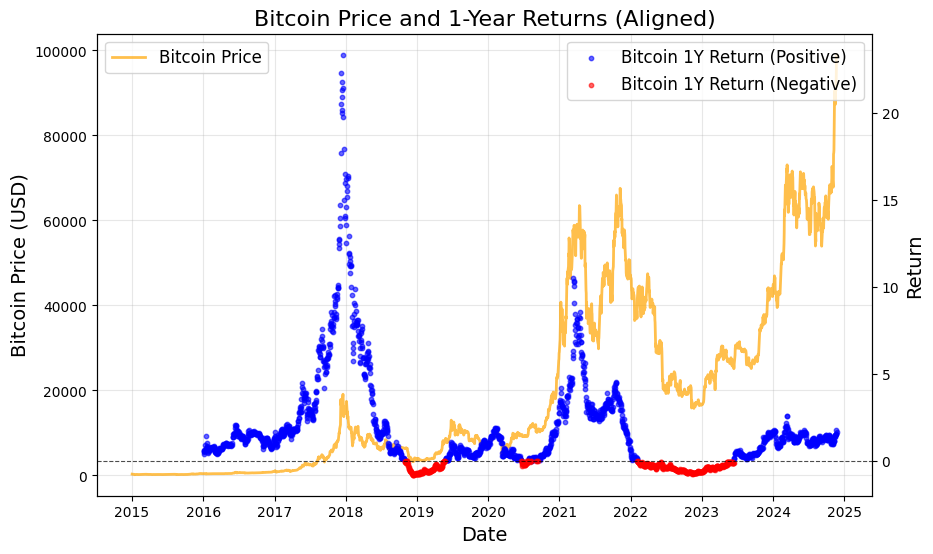

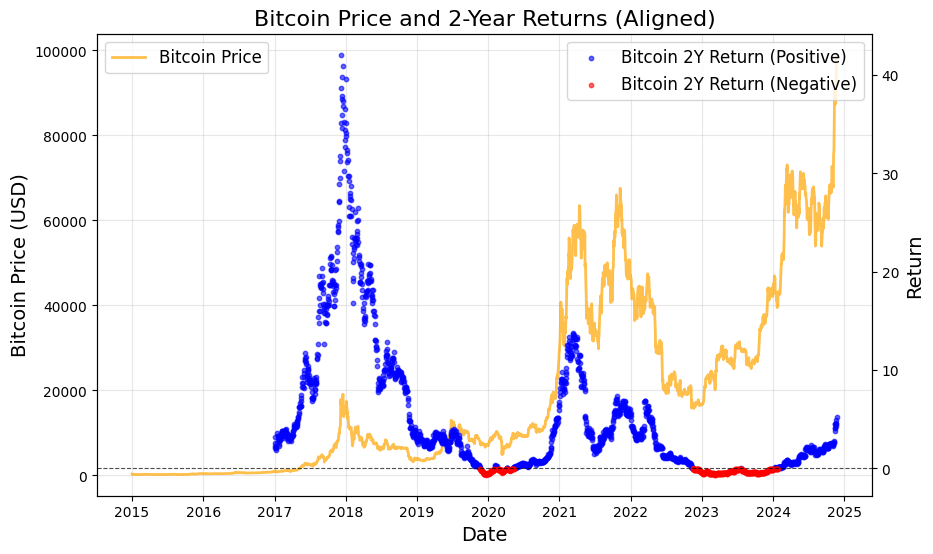

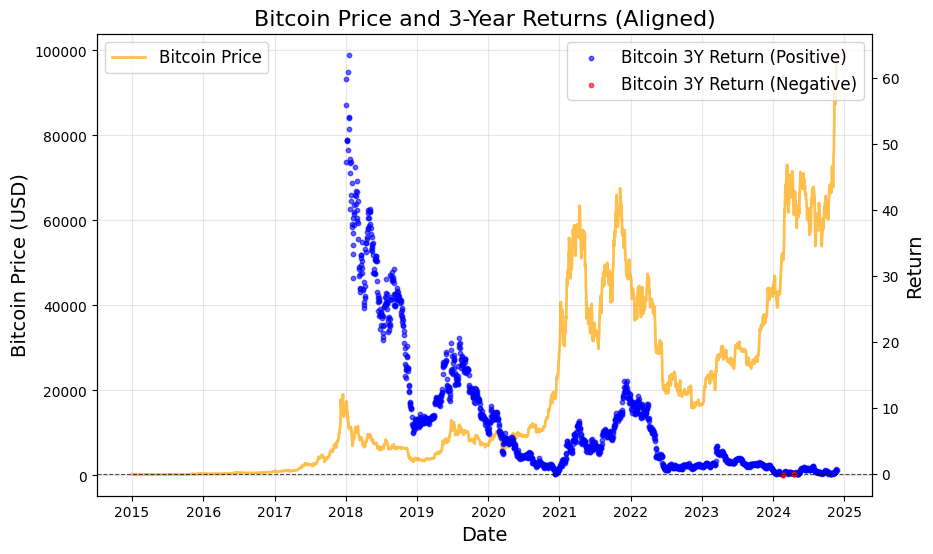

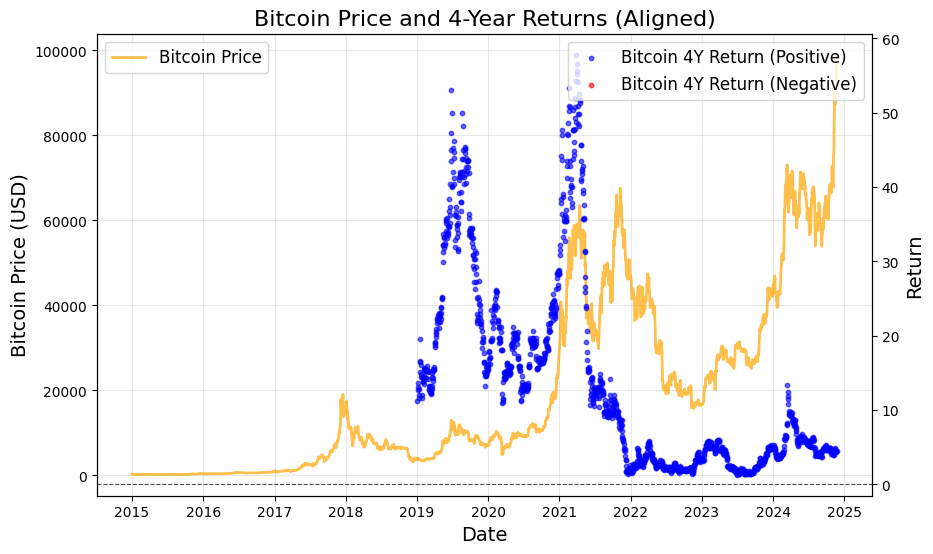

In [32]:
for period in periods:
    # Calculate the shift in trading days (4 years for the 4-Year Return)
    shifted_returns = combined_df[f"BTC {period}Y Return"].shift(252 * period)  # Shift returns forward by 4 years
    
    fig, ax1 = plt.subplots(figsize=(10, 6))
    
    # Line plot for Bitcoin price on the primary y-axis
    ax1.plot(
        combined_df.index, 
        combined_df["BTC-USD"], 
        color='orange', 
        label="Bitcoin Price", 
        linewidth=2, 
        alpha=0.7
    )
    
    # Customize primary y-axis for Bitcoin price
    ax1.set_ylabel("Bitcoin Price (USD)", fontsize=14)
    ax1.grid(alpha=0.3)
    ax1.legend(loc="upper left", fontsize=12)
    ax1.set_xlabel("Date", fontsize=14)
    
    # Create a secondary y-axis for Bitcoin returns
    ax2 = ax1.twinx()
    
    # Separate positive and negative returns
    positive_returns = shifted_returns[shifted_returns >= 0]
    negative_returns = shifted_returns[shifted_returns < 0]
    
    # Plot positive returns (blue)
    ax2.scatter(
        positive_returns.index, 
        positive_returns, 
        alpha=0.6, 
        label=f"Bitcoin {period}Y Return (Positive)", 
        color='blue', 
        s=10
    )
    
    # Plot negative returns (red)
    ax2.scatter(
        negative_returns.index, 
        negative_returns, 
        alpha=0.6, 
        label=f"Bitcoin {period}Y Return (Negative)", 
        color='red', 
        s=10
    )
    
    # Customize secondary y-axis for Bitcoin returns
    ax2.set_ylabel("Return", fontsize=14)
    ax2.axhline(0, color='black', linestyle='--', linewidth=0.8, alpha=0.7)  # Add horizontal line at 0
    ax2.legend(loc="upper right", fontsize=12)
    
    # Add title
    plt.title(f"Bitcoin Price and {period}-Year Returns (Aligned)", fontsize=16)
    
    # Show the plot
    plt.show()



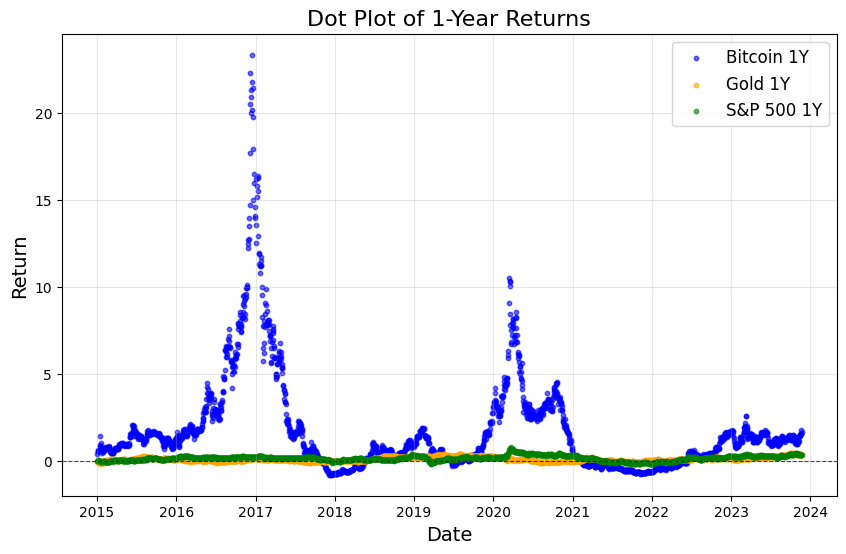

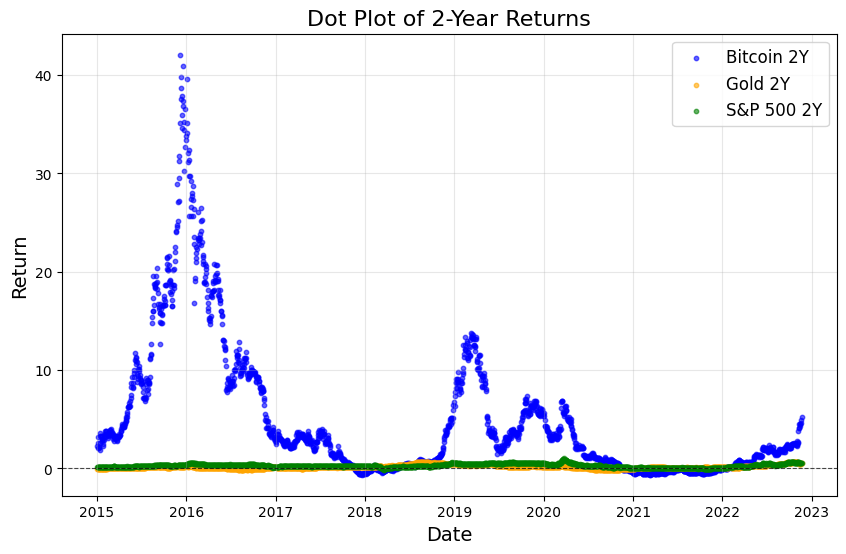

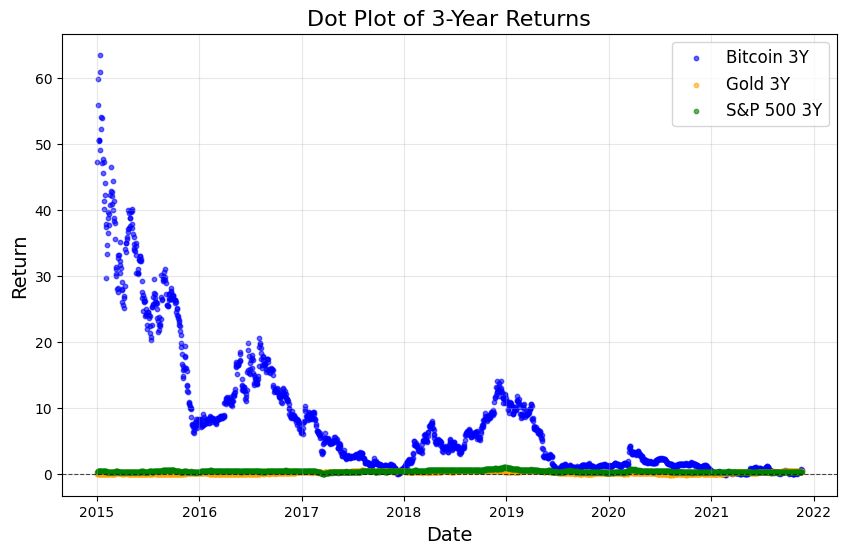

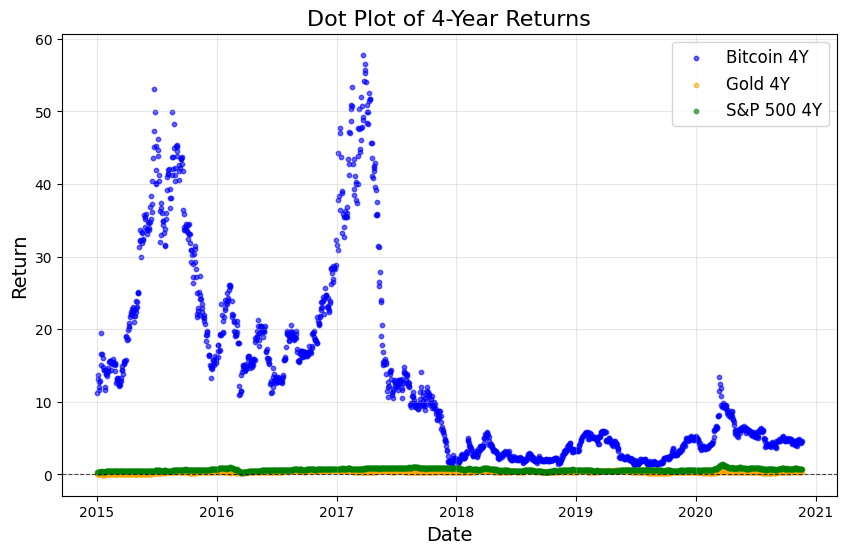

In [ ]:
for period in periods:
    plt.figure(figsize=(10, 6))
    
    # Dot plot for Bitcoin
    plt.scatter(
        combined_df.index, 
        combined_df[f"BTC {period}Y Return"], 
        alpha=0.6, 
        label=f"Bitcoin {period}Y", 
        color='blue', 
        s=10
    )
    
    # Dot plot for Gold
    plt.scatter(
        combined_df.index, 
        combined_df[f"GLD {period}Y Return"], 
        alpha=0.6, 
        label=f"Gold {period}Y", 
        color='orange', 
        s=10
    )
    
    # Dot plot for S&P 500
    plt.scatter(
        combined_df.index, 
        combined_df[f"SPY {period}Y Return"], 
        alpha=0.6, 
        label=f"S&P 500 {period}Y", 
        color='green', 
        s=10
    )
    
    # Add labels and title
    plt.title(f"Dot Plot of {period}-Year Returns", fontsize=16)
    plt.xlabel("Date", fontsize=14)
    plt.ylabel("Return", fontsize=14)
    plt.axhline(0, color='black', linestyle='--', linewidth=0.8, alpha=0.7)  # Add horizontal line at 0
    plt.legend(fontsize=12)
    plt.grid(alpha=0.3)
    
    # Show the plot
    plt.show()


# KDE

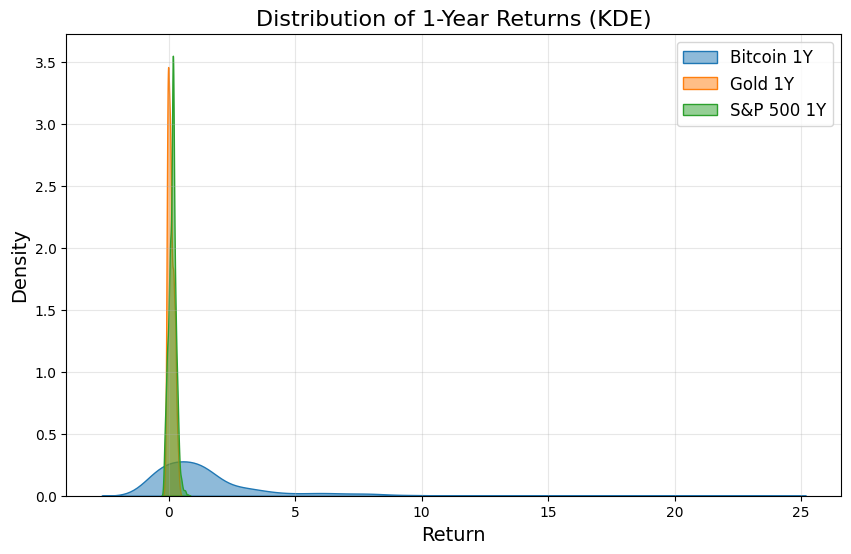

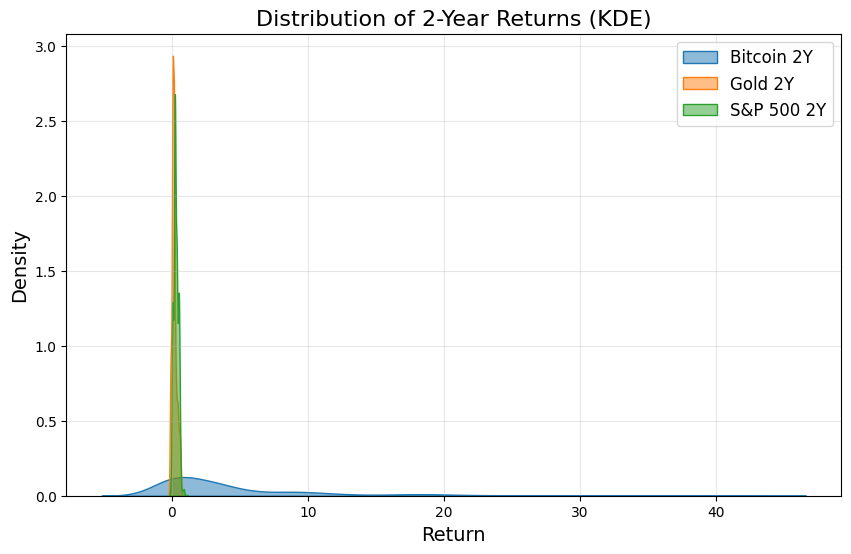

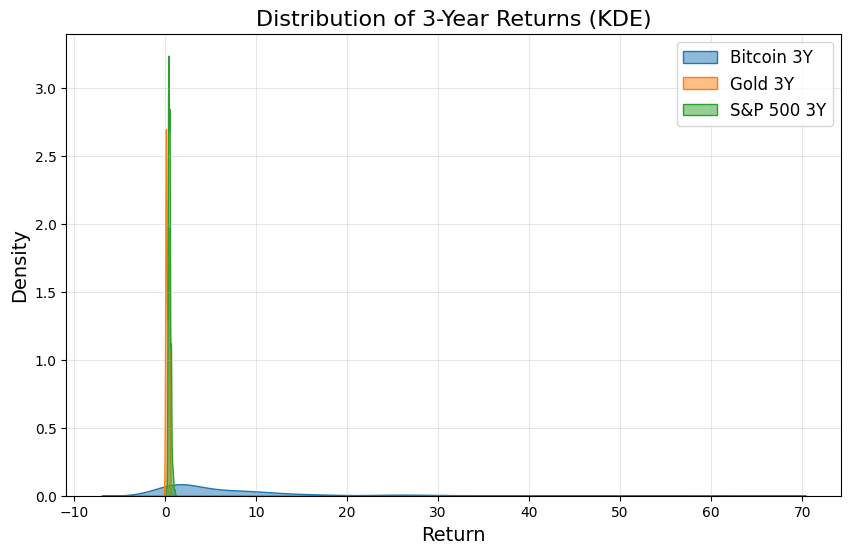

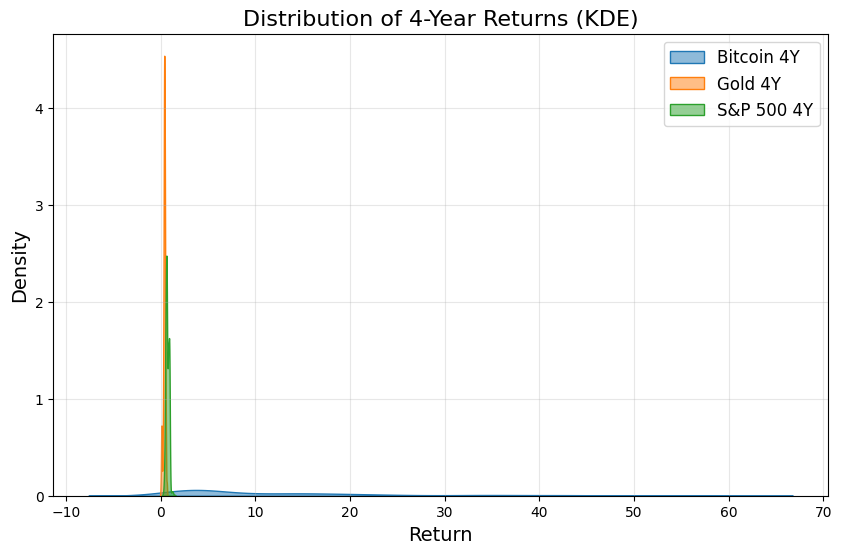

In [24]:
import seaborn as sns

for period in periods:
    plt.figure(figsize=(10, 6))
    
    # KDE for Bitcoin
    sns.kdeplot(combined_df[f"BTC {period}Y Return"], label=f"Bitcoin {period}Y", fill=True, alpha=0.5)
    
    # KDE for Gold
    sns.kdeplot(combined_df[f"GLD {period}Y Return"], label=f"Gold {period}Y", fill=True, alpha=0.5)
    
    # KDE for S&P 500
    sns.kdeplot(combined_df[f"SPY {period}Y Return"], label=f"S&P 500 {period}Y", fill=True, alpha=0.5)
    
    # Labels and title
    plt.title(f"Distribution of {period}-Year Returns (KDE)", fontsize=16)
    plt.xlabel("Return", fontsize=14)
    plt.ylabel("Density", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.3)
    
    plt.show()


# Log

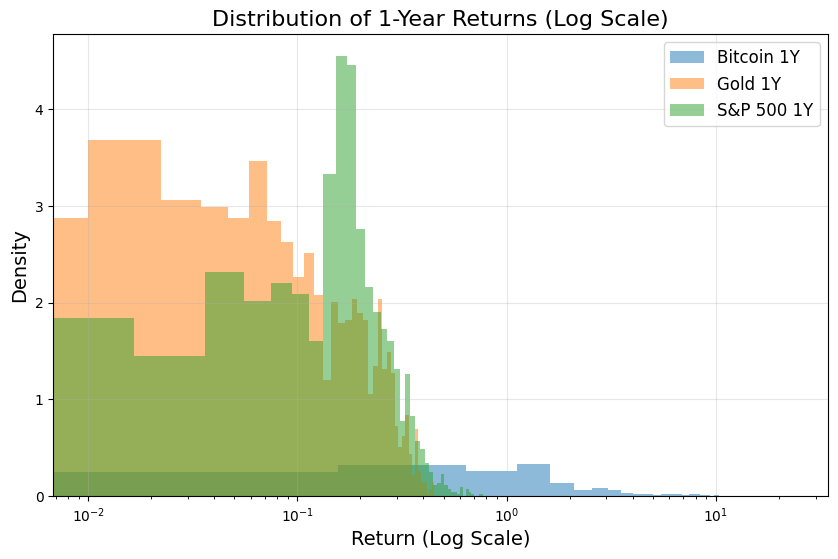

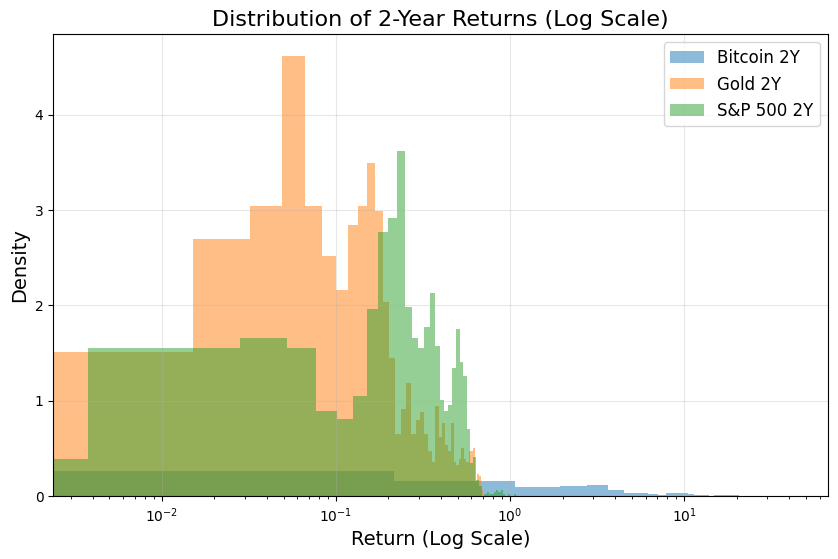

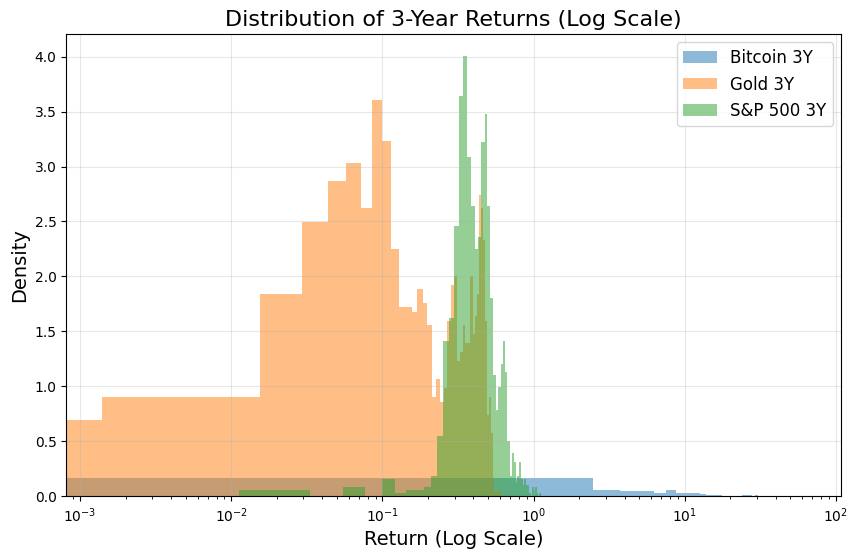

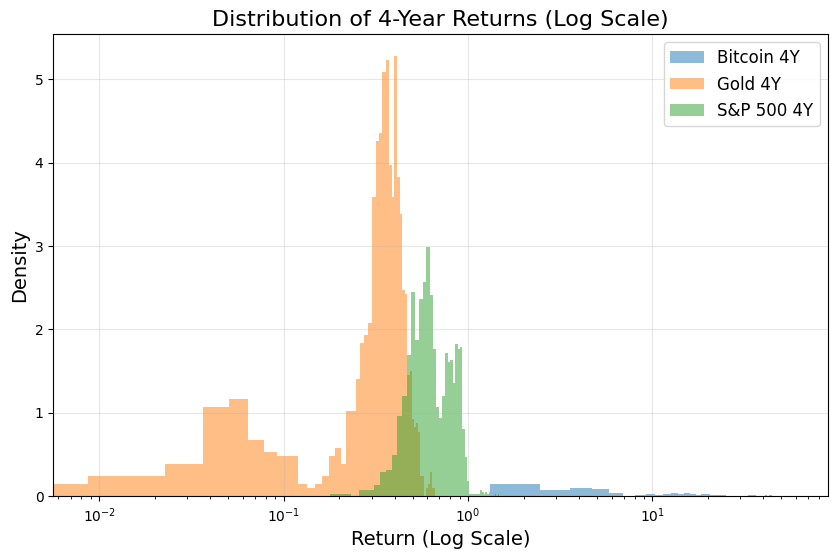

In [23]:
for period in periods:
    plt.figure(figsize=(10, 6))
    
    # Plot histograms with log scale
    plt.hist(combined_df[f"BTC {period}Y Return"], bins=50, alpha=0.5, label=f"Bitcoin {period}Y", density=True)
    plt.hist(combined_df[f"GLD {period}Y Return"], bins=50, alpha=0.5, label=f"Gold {period}Y", density=True)
    plt.hist(combined_df[f"SPY {period}Y Return"], bins=50, alpha=0.5, label=f"S&P 500 {period}Y", density=True)
    
    # Log scale
    plt.xscale("log")
    
    # Labels and title
    plt.title(f"Distribution of {period}-Year Returns (Log Scale)", fontsize=16)
    plt.xlabel("Return (Log Scale)", fontsize=14)
    plt.ylabel("Density", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.3)
    
    plt.show()


# Original

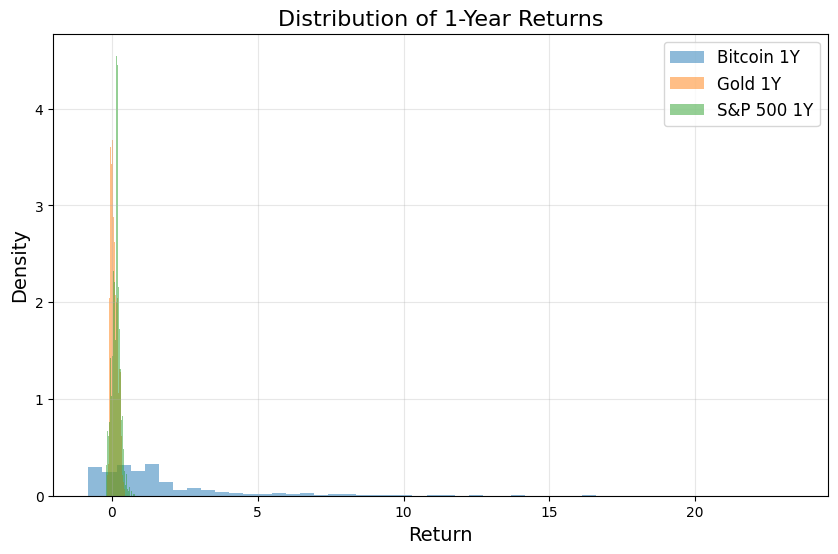

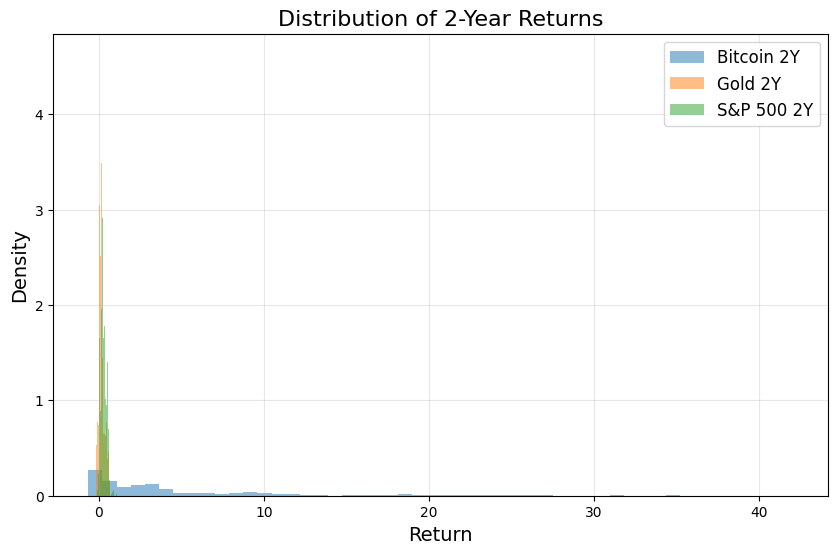

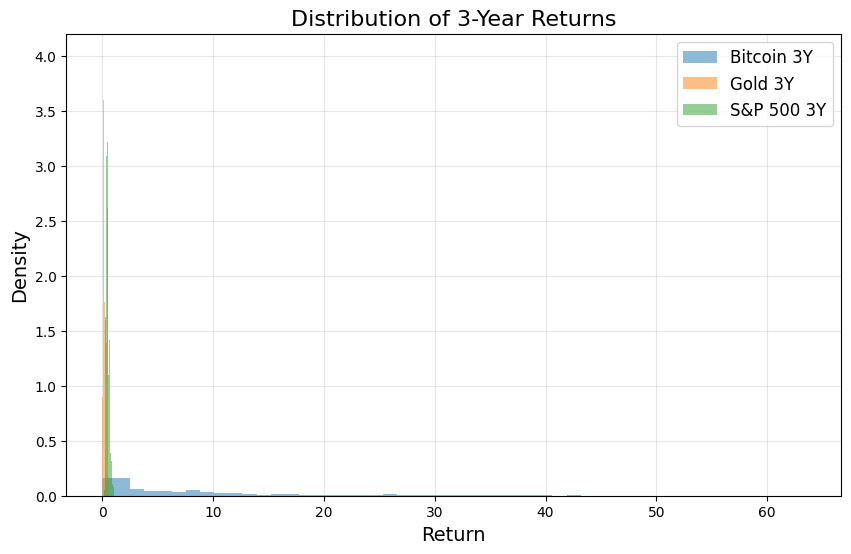

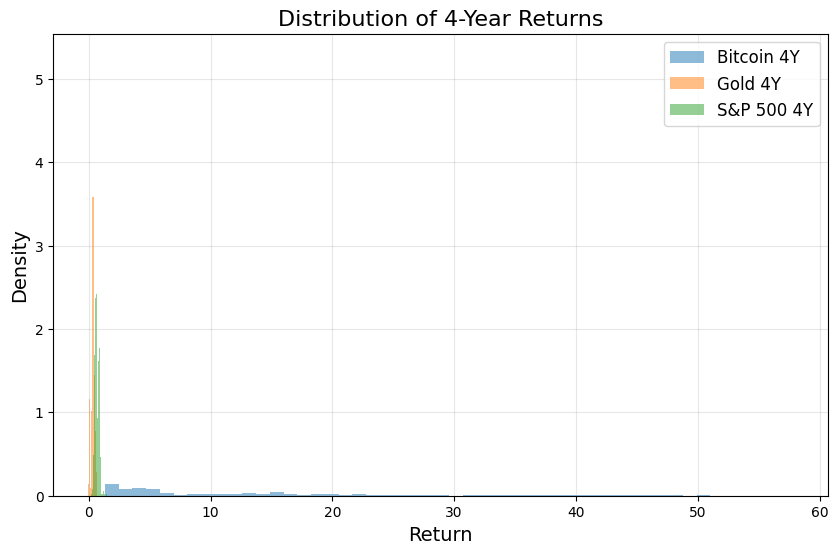

In [22]:
import matplotlib.pyplot as plt

# Define periods for returns
periods = [1, 2, 3, 4]

# Plotting the distributions for each period
for period in periods:
    plt.figure(figsize=(10, 6))
    
    # Histogram for Bitcoin
    plt.hist(combined_df[f"BTC {period}Y Return"], bins=50, alpha=0.5, label=f"Bitcoin {period}Y", density=True)
    
    # Histogram for Gold
    plt.hist(combined_df[f"GLD {period}Y Return"], bins=50, alpha=0.5, label=f"Gold {period}Y", density=True)
    
    # Histogram for S&P 500
    plt.hist(combined_df[f"SPY {period}Y Return"], bins=50, alpha=0.5, label=f"S&P 500 {period}Y", density=True)
    
    # Add labels and title
    plt.title(f"Distribution of {period}-Year Returns", fontsize=16)
    plt.xlabel("Return", fontsize=14)
    plt.ylabel("Density", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.3)
    
    # Show the plot
    plt.show()
